[참조 - 위키독스, PyTorch로 시작하는 딥 러닝 입문](https://wikidocs.net/52846)

## 1. 뷰 (View)
- **(중요) 변경 전과 후의 Tensor 내부의 원소 개수 유지하면서 모양 & 크기 변경!!**
- 사이즈 `-1`로 설정 -> 설정한 다른 차원으로부터 해당 값 유추
- Numpy의 `reshape`와 같은 역할 
- Tensor 크기(Shape) 변경 


In [1]:
import torch
import numpy as np

In [2]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])

ft = torch.FloatTensor(t)        # 임의의 3 dim Tensor

In [3]:
print(ft.shape)

torch.Size([2, 2, 3])


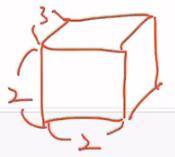

1-1) 3 dim --> 2 dim Tensor

In [4]:
print(ft.view([-1, 3]))        # ft라는 텐서 --> (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)  # 크기 변경한 텐서 크기 확인 

# (2, 2, 3) -> (2 × 2, 3) -> (4, 3) 
# (2 × 2 × 3) = (4 × 3) = 12 
# 사이즈 12로 유지하면서 크기 변경!

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


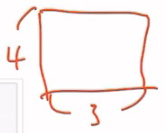

In [5]:
## (2 × 2 × 3) = (? × 1 × 3) = 12
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


## 2. 스퀴즈 (Squeeze)
- **(중요) 변경 전과 후의 Tensor 내부의 원소 개수 유지하면서 모양 & 크기 변경!!**
- 차원이 1인 차원 제거 

In [6]:
ft = torch.FloatTensor([[0], [1], [2]])   # (3 × 1) - 2 dim Tensor

print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [7]:
print(ft.squeeze())       # 1번째 차원이 '1'이므로 제거 
print(ft.squeeze().shape) # 크기 확인: (3, 1) --> (3,)

tensor([0., 1., 2.])
torch.Size([3])


## 3. 언스퀴즈 (Unsqueeze)
- **(중요) 변경 전과 후의 Tensor 내부의 원소 개수 유지하면서 모양 & 크기 변경!!**
- `Squeeze`와 정반대
- 특정 위치에 1차원 추가 




In [8]:
ft = torch.Tensor([0, 1, 2])   # (3,) - 1 dim Tensor 

print(ft.shape)

torch.Size([3])


In [9]:
## 1) 0번째 차원에 1차원 추가
print(ft.unsqueeze(0))       # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape) # 크기 확인: (3,) --> (1, 3)

# 위는 Unsqueeze와 view 동일한 결과 보여줌 

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [10]:
## 2) unsqueeze 인자로 -1 --> 인덱싱 마지막 의미 
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)  

# ==> 1 dim Tensor -> unsqueeze(1) = unsqueeze(-1) 결과 동일 

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


==> `view()`, `squeeze()`, `unsqueeze()`는 텐서의 원소 수를 그대로 유지하면서 모양과 차원을 조절!!